 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [120]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns 
from pathlib import Path


%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [45]:
# Reading whale returns

whale_portfolio = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_portfolio, index_col= "Date", parse_dates = True, infer_datetime_format = True)


In [46]:
# Count nulls

whale_returns = whale_returns.replace(0, np.nan)


In [47]:
# Drop nulls

whale_returns = whale_returns.dropna()
whale_returns.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [48]:
# Reading algorithmic returns

algorithmic_trading_data = Path("Resources/algo_returns.csv")
algorithm_returns = pd.read_csv(algorithmic_trading_data, index_col = "Date", parse_dates = True, infer_datetime_format = True)



In [49]:
# Count nulls

algorithm_returns = algorithm_returns.replace(0, np.nan)


In [50]:
# Drop nulls

algorithm_returns = algorithm_returns.dropna()
algorithm_returns.isnull().sum()


Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [51]:
# Reading S&P 500 Closing Prices

sp_data = Path("Resources/sp500_history.csv")
sp_price = pd.read_csv(sp_data, index_col = "Date", parse_dates = True, infer_datetime_format = True)


In [52]:
# Check Data Types

sp_price.dtypes


Close    object
dtype: object

In [53]:
# Fix Data Types

sp_price.sort_index(inplace = True)
sp_price['Close'] = sp_price['Close'].str.replace("$", '').astype(float)
sp_price.head()


C:\Users\asus\AppData\Local\Temp\ipykernel_39780\3692281321.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_price['Close'] = sp_price['Close'].str.replace("$", '').astype(float)


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [54]:
# Calculate Daily Returns

sp_daily_returns = sp_price.astype(float).pct_change()
sp_daily_returns.sort_index()
sp_daily_returns.head()


,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [55]:
# Drop nulls

sp_daily_returns = sp_daily_returns.dropna()
sp_daily_returns.isnull().sum()



Close    0
dtype: int64

In [56]:
# Rename `Close` Column to be specific to this portfolio.

sp_daily_returns.rename(columns = {'Close': 'SP500'}, inplace = True)


## Combine Whale, Algorithmic, and S&P 500 Returns

In [57]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

combine_df = pd.concat([whale_returns, algorithm_returns, sp_daily_returns], axis = "columns", join = "inner")
combine_df.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

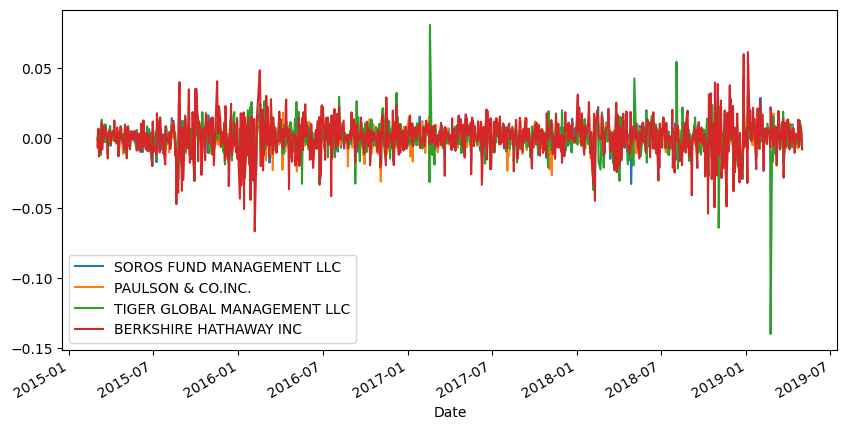

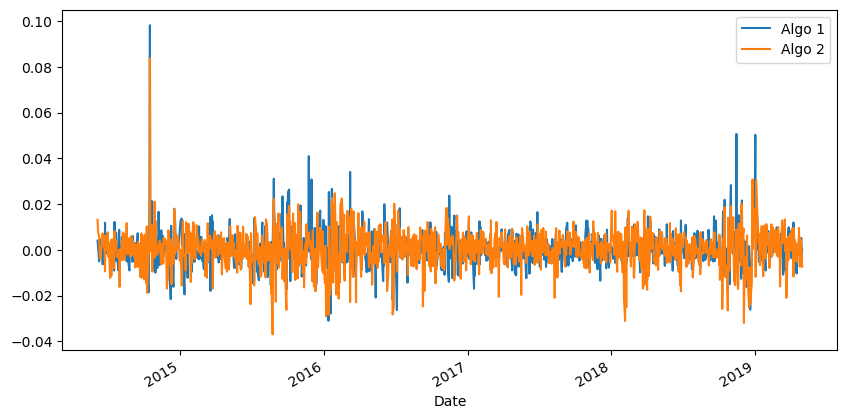

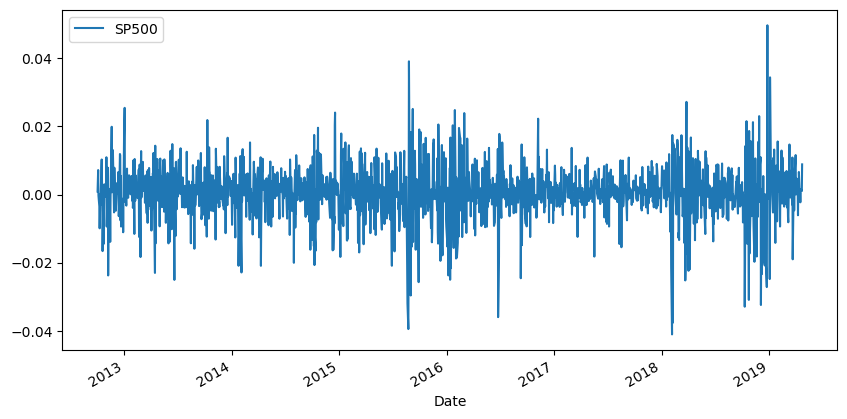

In [58]:
# Plot daily returns of all portfolios

whale_returns.plot(figsize = (10,5))
algorithm_returns.plot(figsize = (10,5))
sp_daily_returns.plot(figsize = (10,5))


#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns of All Portfolios'}, xlabel='Date'>

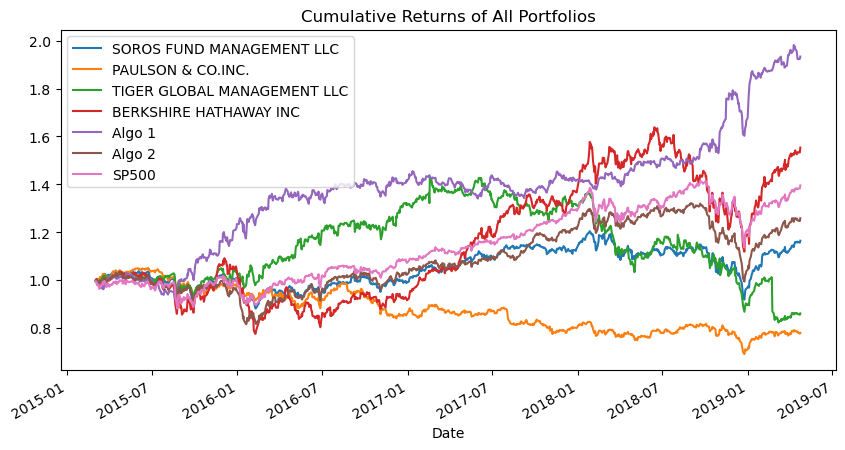

In [59]:
# Calculate cumulative returns of all portfolios

cum_returns = (1 + combine_df).cumprod()
cum_returns


# Plot cumulative returns

cum_returns.plot(figsize=(10,5), title = "Cumulative Returns of All Portfolios")


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

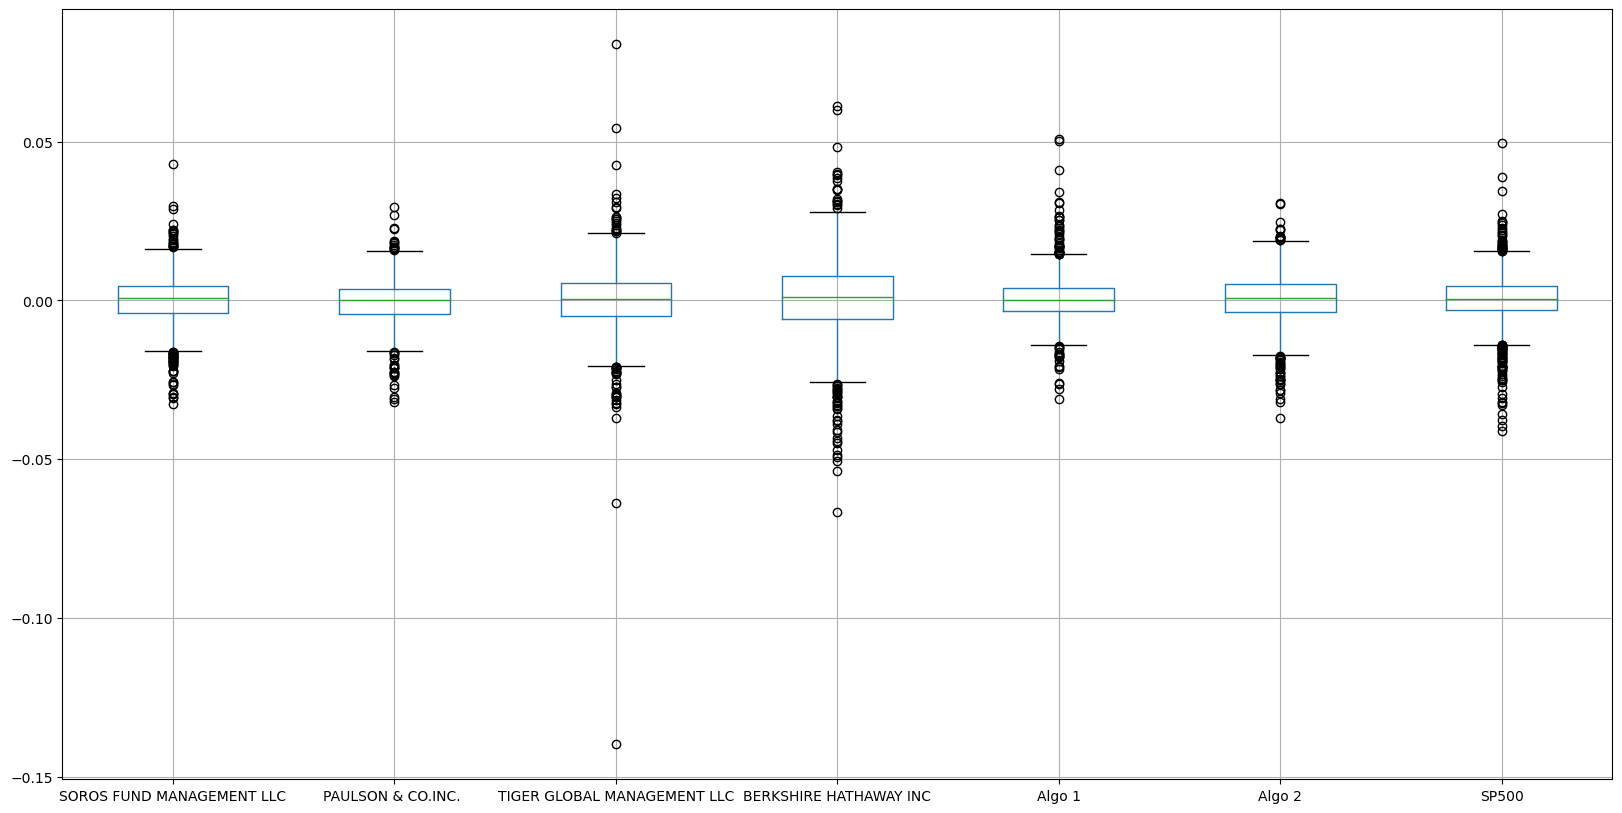

In [60]:
# Box plot to visually show risk

combine_df.boxplot(figsize = (20,10))


### Calculate Standard Deviations

In [127]:
# Calculate the daily standard deviations of all portfolios
combine_df.std()

SOROS FUND MANAGEMENT LLC      0.008008
PAULSON & CO.INC.              0.007123
TIGER GLOBAL MANAGEMENT LLC    0.011049
BERKSHIRE HATHAWAY INC         0.013102
Algo 1                         0.007675
Algo 2                         0.008320
SP500                          0.008574
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [132]:
# Calculate  the daily standard deviation of S&P 500

sp_daily_returns.std()

# Determine which portfolios are riskier than the S&P 500

## Berkshire Hathway and Tiger Global Management LLC are riskier than S&P 500 as they have higher standard deviation 


SP500    0.008111
dtype: float64

### Calculate the Annualized Standard Deviation

In [62]:
# Calculate the annualized standard deviation (252 trading days)

annual_variance = (combine_df.var()*252)
annual_dev = np.sqrt(annual_variance)
annual_dev 



SOROS FUND MANAGEMENT LLC      0.127116
PAULSON & CO.INC.              0.113071
TIGER GLOBAL MANAGEMENT LLC    0.175394
BERKSHIRE HATHAWAY INC         0.207987
Algo 1                         0.121840
Algo 2                         0.132071
SP500                          0.136114
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

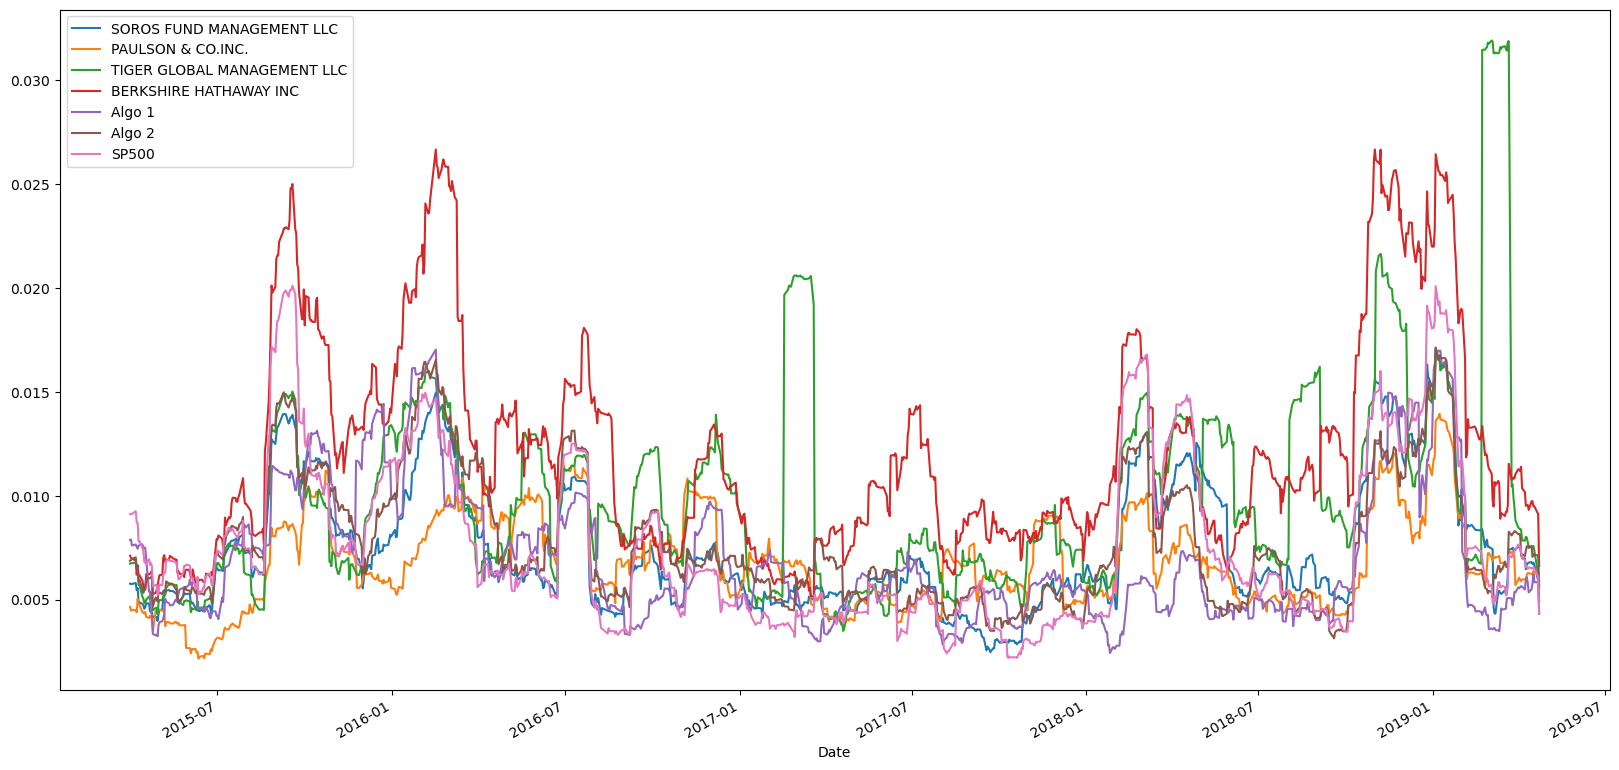

In [63]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

combine_df.rolling(window = 21).std()

# Plot the rolling standard deviation

combine_df.rolling(window = 21).std().plot(figsize = (20,10))


### Calculate and plot the correlation

In [135]:
# Calculate the correlation

correlation = combine_df.corr()
correlation 

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699948,0.561253,0.754357,0.323390,0.840913,0.847691
PAULSON & CO.INC.,0.699948,1.000000,0.434478,0.545676,0.270782,0.689659,0.677684
TIGER GLOBAL MANAGEMENT LLC,0.561253,0.434478,1.000000,0.424441,0.165547,0.516021,0.631307
BERKSHIRE HATHAWAY INC,0.754357,0.545676,0.424441,1.000000,0.293974,0.699781,0.760159
Algo 1,0.323390,0.270782,0.165547,0.293974,1.000000,0.286021,0.276411
Algo 2,0.840913,0.689659,0.516021,0.699781,0.286021,1.000000,0.858669
SP500,0.847691,0.677684,0.631307,0.760159,0.276411,0.858669,1.000000


<AxesSubplot:>

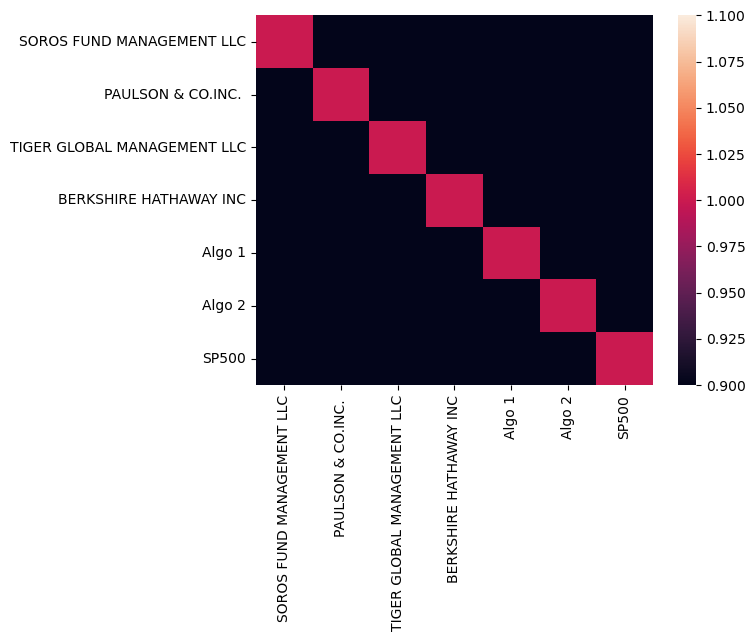

In [139]:
# Display de correlation matrix

sns.heatmap(correlation, vmin = 1, vmax = 1)


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [36]:
# Calculate covariance of a single portfolio

covariance = combine_df['SOROS FUND MANAGEMENT LLC'].cov(combine_df['SP500'])
covariance 

5.8201984434496446e-05

In [38]:
# Calculate variance of S&P 500

variance = combine_df['SP500'].var()
variance 

7.351964471554546e-05

<AxesSubplot:title={'center':'60 Day Rolling Soros Fund Management LLC'}, xlabel='Date'>

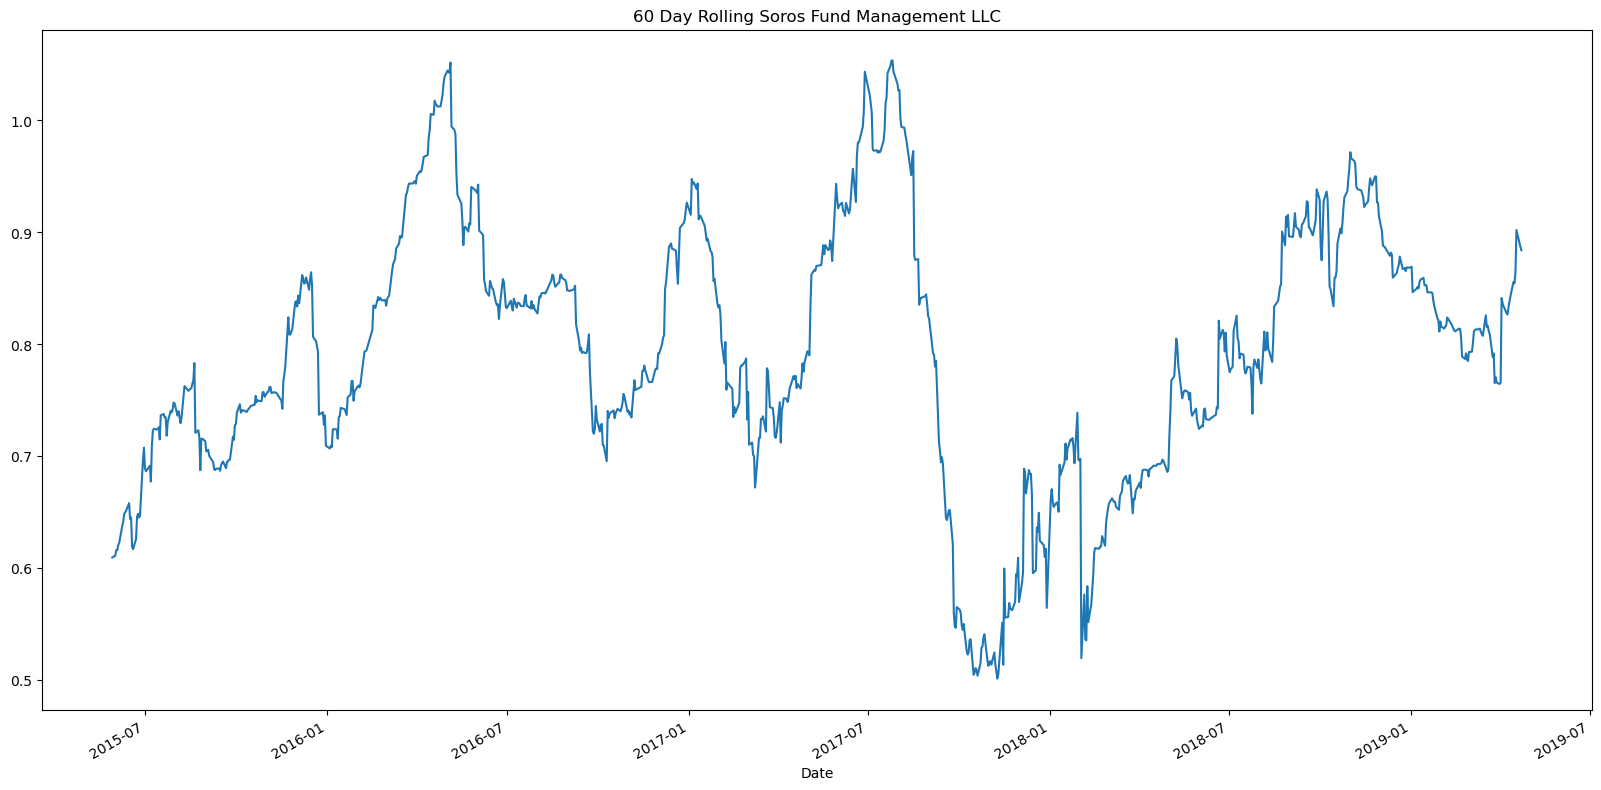

In [41]:
# Computing beta

sfm_beta = covariance / variance 
sfm_beta 


# Plot beta trend

roll_covar = combine_df['SOROS FUND MANAGEMENT LLC'].rolling(window = 60).cov(combine_df['SP500'])
roll_var = combine_df['SP500'].rolling(window = 60).var()

roll_beta = roll_covar / roll_var 
roll_beta.plot(figsize = (20,10), title = '60 Day Rolling Soros Fund Management LLC')


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

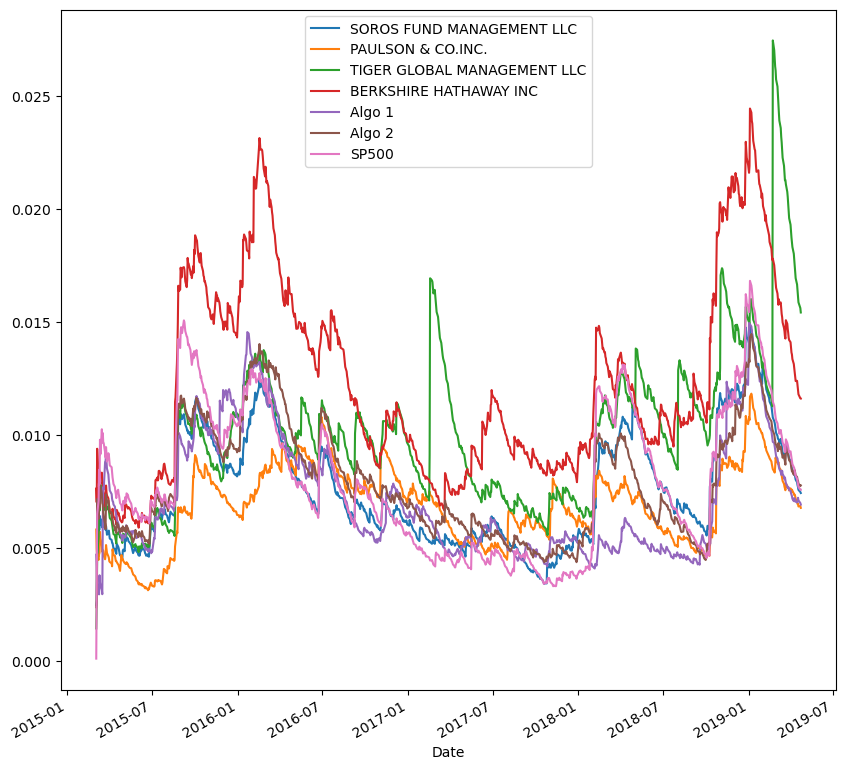

In [43]:
# Use `ewm` to calculate the rolling window

combine_df.ewm(halflife = 21).std().plot(figsize = (10,10))


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [45]:
# Annualized Sharpe Ratios

sharpe_ratios = (combine_df.mean()*252)/(combine_df.std()*np.sqrt(252))
sharpe_ratios 


SOROS FUND MANAGEMENT LLC      0.361475
PAULSON & CO.INC.             -0.490436
TIGER GLOBAL MANAGEMENT LLC   -0.122777
BERKSHIRE HATHAWAY INC         0.630644
Algo 1                         1.405765
Algo 2                         0.498867
SP500                          0.676679
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}>

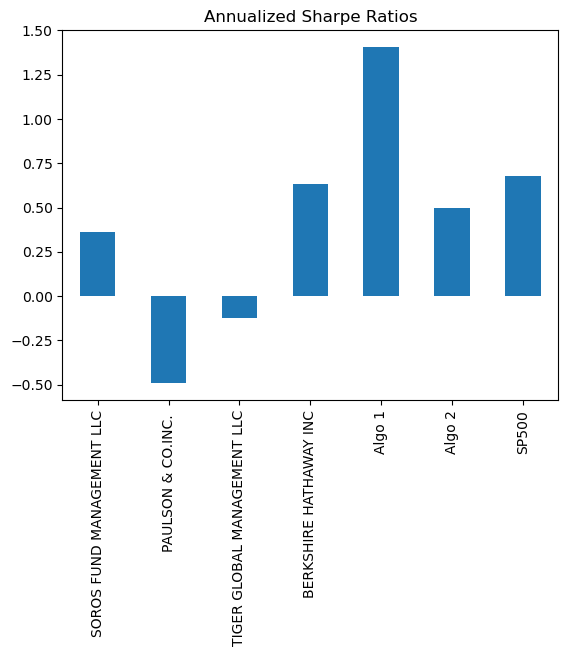

In [47]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot(kind = "bar", title = "Annualized Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [31]:
# Reading data from 1st stock

google_stock = Path("Resources/goog_historical.csv")
google_df = pd.read_csv(google_stock, index_col = "Trade DATE", infer_datetime_format = True, parse_dates = True)



In [32]:
# Reading data from 2nd stock

appl_stock = Path("Resources/aapl_historical.csv")
appl_df = pd.read_csv(appl_stock, index_col = "Trade DATE", infer_datetime_format = True, parse_dates = True)


In [33]:
# Reading data from 3rd stock

cost_stock = Path("Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_stock, index_col = "Trade DATE", infer_datetime_format = True, parse_dates = True)



In [34]:
# Combine all stocks in a single DataFrame

combined_df = pd.concat([google_df, appl_df, cost_df], axis = 'columns', join = 'inner')
combined_df.head()



,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,GOOG,1162.38,AAPL,200.72,COST,243.47
2019-05-08,GOOG,1166.27,AAPL,202.90,COST,241.34
2019-05-07,GOOG,1174.10,AAPL,202.86,COST,240.18
2019-05-06,GOOG,1189.39,AAPL,208.48,COST,244.23
2019-05-03,GOOG,1185.40,AAPL,211.75,COST,244.62


In [78]:
# Reset Date index

combined_df.sort_index(inplace = True)
combined_df.head()


,AAPL,GOOG,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [81]:
# Reorganize portfolio data by having a column per symbol

combined_df.columns = ['AAPL','GOOG', 'COST']

combined_df.head()


,AAPL,GOOG,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [108]:
# Calculate daily returns

daily_ret = combined_df.pct_change()
daily_ret.head()

# Drop NAs

combined_df.dropna()

# Display sample data


,AAPL,GOOG,COST
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60
...,...,...,...
2019-05-03,1185.40,211.75,244.62
2019-05-06,1189.39,208.48,244.23
2019-05-07,1174.10,202.86,240.18


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [109]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

portfolio_ret = daily_ret.dot(weights)
returns = pd.DataFrame(portfolio_ret)

# Display sample data

returns.head()


,0
Trade DATE,
2018-05-11,NaN
2018-05-14,0.000015
2018-05-15,-0.010064
2018-05-16,0.009403
2018-05-17,-0.001595


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [112]:
# Join your returns DataFrame to the original returns DataFrame

combined_df_2 = pd.concat([portfolio_ret, combine_df], axis = 'columns', join = 'inner')
combined_df_2.rename(columns = {0: "Data"}, inplace = True)



In [113]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


combined_df_2.dropna(inplace = True)
combined_df_2.sort_index()


,Data,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
2018-05-15,-0.010064,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842
2018-05-16,0.009403,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061
2018-05-17,-0.001595,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856
2018-05-18,-0.006061,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632
2018-05-21,0.007600,0.002503,-0.001195,-0.001153,0.010370,-0.003092,0.004924,0.007387
...,...,...,...,...,...,...,...,...
2019-04-16,0.000340,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,0.009292,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001545,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,0.001217,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [114]:
# Calculate the annualized `std`

combined_df_2.std()
ann_var = (combined_df_2.var()*252)
ann_std = np.sqrt(ann_var)
ann_var


Data                           0.045412
SOROS FUND MANAGEMENT LLC      0.021979
PAULSON & CO.INC.              0.013921
TIGER GLOBAL MANAGEMENT LLC    0.055236
BERKSHIRE HATHAWAY INC         0.062407
Algo 1                         0.018146
Algo 2                         0.019702
SP500                          0.023416
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

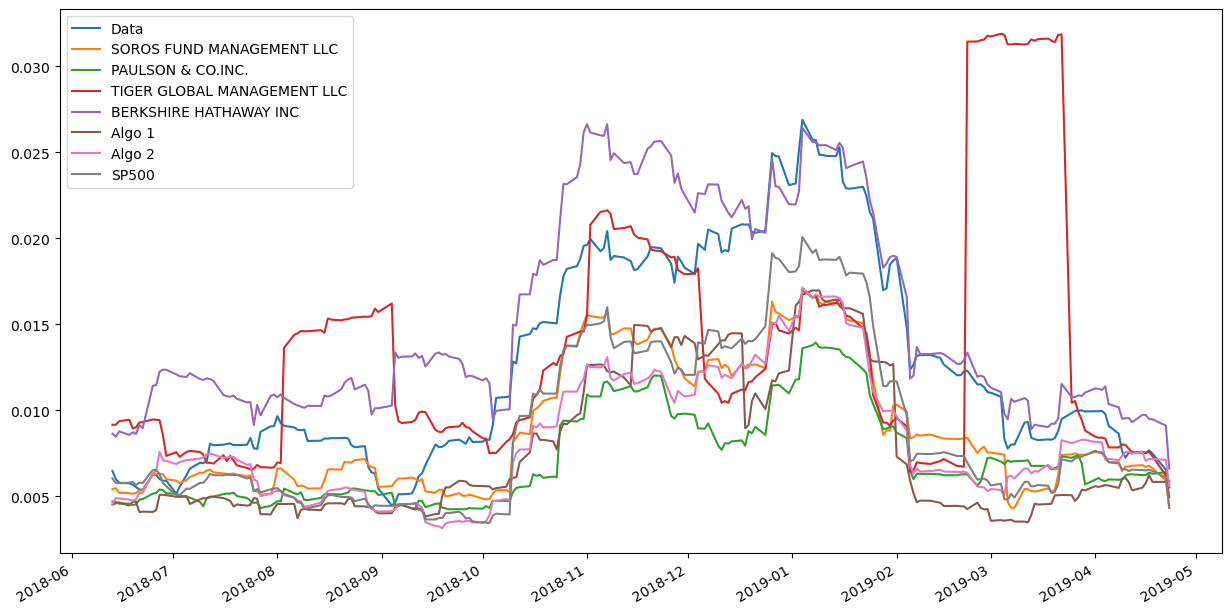

In [115]:
# Calculate rolling standard deviation


# Plot rolling standard deviation

combined_df_2.rolling(window=21).std().plot(figsize = (15,8))


### Calculate and plot the correlation

<AxesSubplot:>

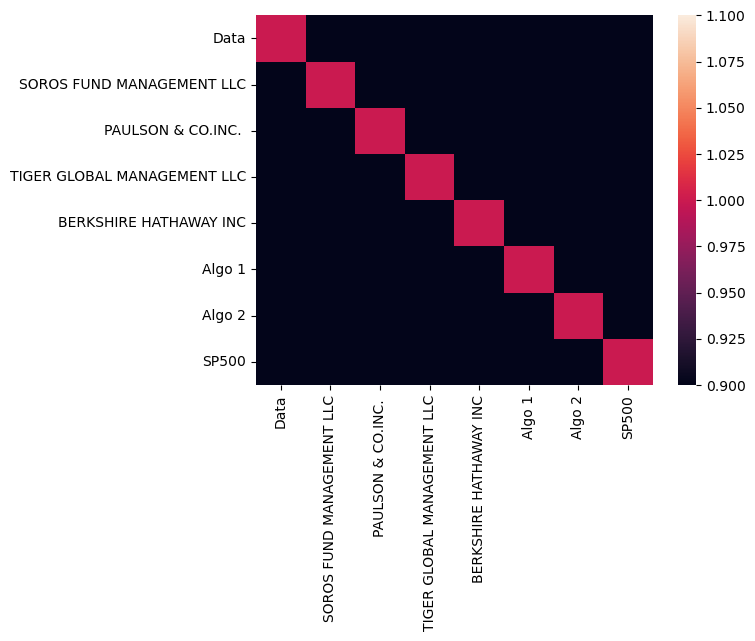

In [125]:
# Calculate and plot the correlation

correlat = combined_df_2.corr()

sns.heatmap(correlat, vmin = 1, vmax = 1)



### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Beta'}>

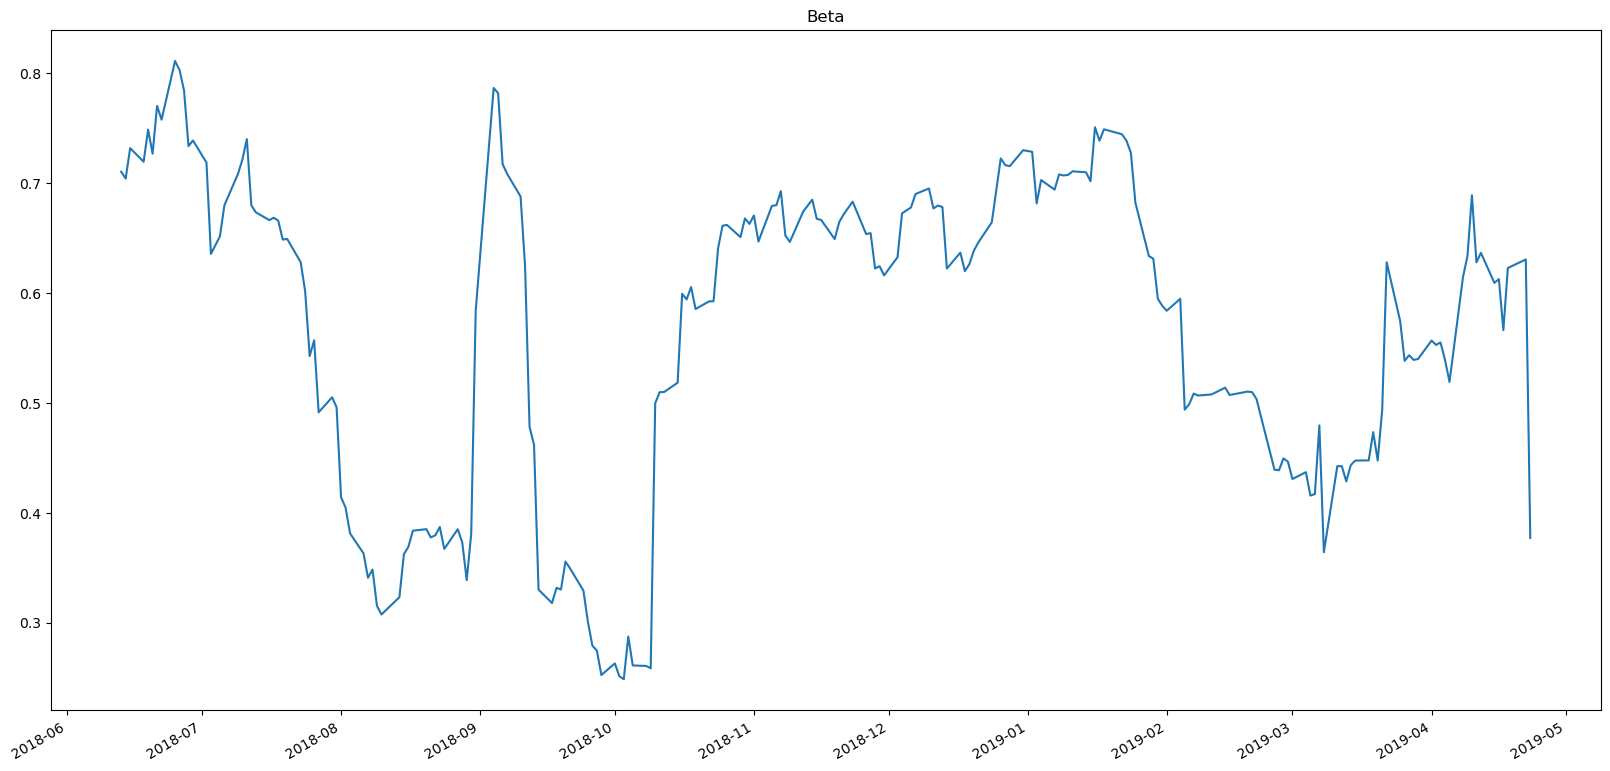

In [117]:
# Calculate and plot Beta

roll_variance = combined_df_2['Data'].rolling(window = 21).var()
roll_covariance = combined_df_2['Data'].rolling(window = 21).cov(combined_df_2['SP500'])
roll_beta = roll_covariance/roll_variance 
roll_beta.plot(figsize = (20,10), title = 'Beta')


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [118]:
# Calculate Annualized Sharpe Ratios

sharpe_ratioss = (combined_df_2.mean()*252)/((combined_df_2).std()*np.sqrt(252))
sharpe_ratioss


Data                           0.888262
SOROS FUND MANAGEMENT LLC      0.435313
PAULSON & CO.INC.              0.261500
TIGER GLOBAL MANAGEMENT LLC   -1.045302
BERKSHIRE HATHAWAY INC         0.161461
Algo 1                         2.143096
Algo 2                         0.034986
SP500                          0.513355
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

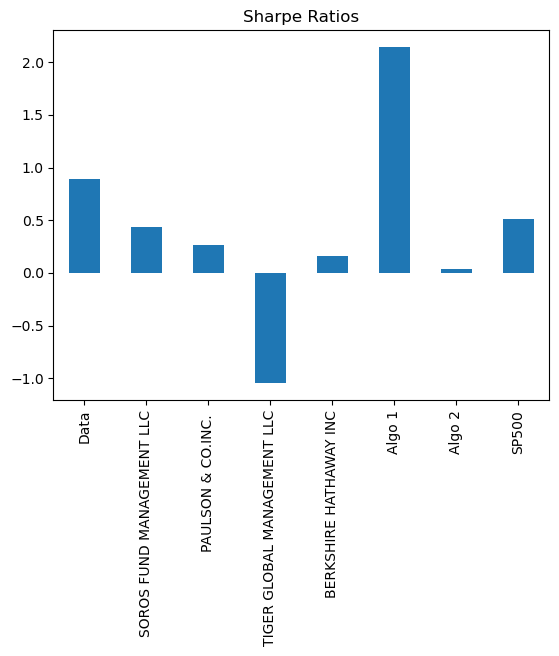

In [119]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratioss.plot(kind="bar", title = "Sharpe Ratios")


### How does your portfolio do?

Write your answer here!

In [ ]:
# In comparasion to the S&P500, it did perform well. It had the better annualized sharpe ratio. But the S&P500 had the better annualized standard deviation 